# pybis2spice Usage

This notebook provides an example of how to use the pybis2spice package.

In [2]:
# Directory setup
import sys
import os
  
parent = os.path.dirname(os.getcwd())
sys.path.append(parent)

In [3]:
# Import the library
import pybis2spice

## User Inputs

The user need to provide the following information: 
* file_path to the ibis model file location
* model_name - The name of the model of interest within the ibis file
* component_name - The name of the component/package of interest within the ibis file

In [22]:
file_path = 'ibis/sn74lvc2t45.ibs'
model_name = 'LVC2T45_IO_A_18'
component_name = 'LVC2T45_DCT'

In [3]:
file_path = 'ibis/hct1g08.ibs'
model_name = 'HCT1G08_OUTN_50'
component_name = '74HCT1G08_GW'

## Input Data Processing

In [23]:
# Loads the IBIS model with the user input parameters 
ibis_data = pybis2spice.DataModel(file_path, model_name, component_name)

# printing the output allows the user to scan and check that the right data has been loaded
print(ibis_data) 

--------------------------------------------------------------------------------------------------------
model name: LVC2T45_IO_A_18
component name: LVC2T45_DCT
model type: I/O
v_range: [1.8  1.65 1.95]

	package parameters [Typ, Min, Max]:
		r_pkg: [0.029 0.028 0.031]
		l_pkg: [1.796e-09 1.666e-09 1.924e-09]
		c_pkg: [2.31e-13 2.21e-13 2.42e-13]
		c_comp: [6.69e-12 5.95e-12 7.53e-12]

	iv data:
		pullup data size: (100, 4)
		pulldown data size: (100, 4)
		pwr clamp data size: ()
		gnd clamp data size: (100, 4)

	rising waveform vt data:
		v_fixture:[0. 0. 0.]. r_fixture: 500.0. waveform_size: (100, 4)
		v_fixture:[1.8  1.65 1.95]. r_fixture: 500.0. waveform_size: (100, 4)
		
	falling waveform vt data:
		v_fixture:[1.8  1.65 1.95]. r_fixture: 500.0. waveform_size: (100, 4)
		v_fixture:[0. 0. 0.]. r_fixture: 500.0. waveform_size: (100, 4)
		
--------------------------------------------------------------------------------------------------------


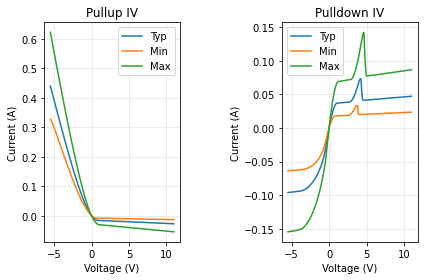

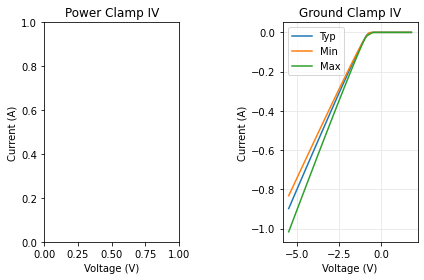

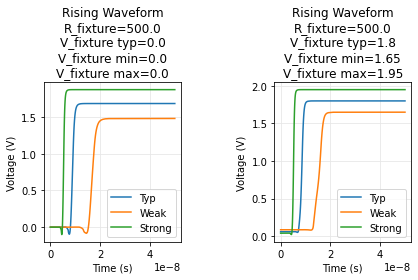

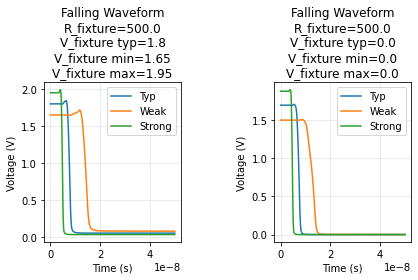

In [24]:
# The package provides some plot functions to help visualise the input data. 
# If a graph is missing, then it is likely that the data does not exist within the IBIS model
pybis2spice.plot_all_ibis_data(ibis_data)

### Accessing Data Model Attributes

In [25]:
# These are just a list of attributes or functions that can be accessed via the DataModel object

ibis_data.list_components()
ibis_data.list_models()

ibis_data.model_name
ibis_data.component_name
ibis_data.model_type

# Package parastics [typ, min max]
ibis_data.r_pkg
ibis_data.l_pkg
ibis_data.c_pkg
ibis_data.c_comp
ibis_data.v_range

# Accessing IV Tables [voltage, I_typ, I_min, I_max]
ibis_data.iv_pullup
ibis_data.iv_pulldown
ibis_data.iv_gnd_clamp 
ibis_data.iv_pwr_clamp


# Accessing Rising Waveforms
n = 0 # There are 2 waveforms so n can be 0 or 1
ibis_data.vt_rising[n] # Waveform object
ibis_data.vt_rising[n].data # Waveform vt data [time, v_typ, v_min, v_max]
ibis_data.vt_rising[n].v_fix # [typ, min max]
ibis_data.vt_rising[n].r_fix # single value

# Accessing Falling Waveforms
n = 0 # There are 2 waveforms so n can be 0 or 1
ibis_data.vt_falling[n] # Waveform object
ibis_data.vt_falling[n].data # Waveform vt data [time, v_typ, v_min, v_max]
ibis_data.vt_falling[n].v_fix # [typ, min max]
ibis_data.vt_falling[n].r_fix # single value


500.0

## Solving the K-parameters

The K-parameters are the k(t) waveforms that define the transient behaviour of the pullup and pulldown transistor devices during rising and falling edges.

In [26]:
import pybis2spice
file_path = 'IBIS_models/sn74lvc2t45.ibs'
model_name = 'LVC2T45_IO_A_18'
component_name = 'LVC2T45_DCT'
ibis_data = pybis2spice.DataModel(file_path, model_name, component_name)
print(ibis_data) 

--------------------------------------------------------------------------------------------------------
model name: LVC2T45_IO_A_18
component name: LVC2T45_DCT
model type: I/O
v_range: [1.8  1.65 1.95]

	package parameters [Typ, Min, Max]:
		r_pkg: [0.029 0.028 0.031]
		l_pkg: [1.796e-09 1.666e-09 1.924e-09]
		c_pkg: [2.31e-13 2.21e-13 2.42e-13]
		c_comp: [6.69e-12 5.95e-12 7.53e-12]

	iv data:
		pullup data size: (100, 4)
		pulldown data size: (100, 4)
		pwr clamp data size: ()
		gnd clamp data size: (100, 4)

	rising waveform vt data:
		v_fixture:[0. 0. 0.]. r_fixture: 500.0. waveform_size: (100, 4)
		v_fixture:[1.8  1.65 1.95]. r_fixture: 500.0. waveform_size: (100, 4)
		
	falling waveform vt data:
		v_fixture:[1.8  1.65 1.95]. r_fixture: 500.0. waveform_size: (100, 4)
		v_fixture:[0. 0. 0.]. r_fixture: 500.0. waveform_size: (100, 4)
		
--------------------------------------------------------------------------------------------------------


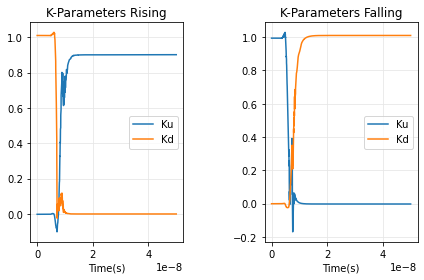

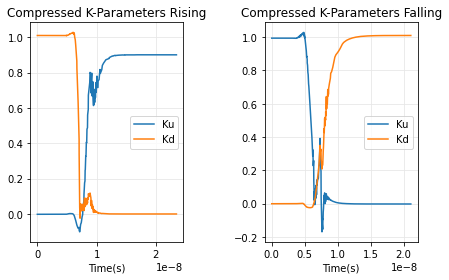

In [27]:
k_r = pybis2spice.solve_k_params_output(ibis_data, corner=1, waveform_type="Rising")
k_f = pybis2spice.solve_k_params_output(ibis_data, corner=1, waveform_type="Falling")

k_r_comp = pybis2spice.compress_param(k_r, threshold=1e-6)
k_f_comp = pybis2spice.compress_param(k_f, threshold=1e-6)

pybis2spice.plot_dual(k_r, k_f, ["Ku", "Kd"], "Time(s)", "", "K-Parameters Rising", "K-Parameters Falling")
pybis2spice.plot_dual(k_r_comp, k_f_comp, ["Ku", "Kd"], "Time(s)", "", "Compressed K-Parameters Rising", "Compressed K-Parameters Falling")

## Generating a subcircuit file

In [3]:
(offset_neg_r, offset_pos_r) = pybis2spice.determine_crossover_offsets(k_r_comp)
(offset_neg_f, offset_pos_f) = pybis2spice.determine_crossover_offsets(k_f_comp)

In [3]:
filepath = f'spice_models/{model_name}_{component_name}_Typ.sub'
pybis2spice.create_output_subcircuit_file(ibis_data, filepath, k_r_comp, k_f_comp)

